# Introduction to the Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

pixar_movies=pd.read_csv("PixarMovies.csv")
print("no of rows and columns", pixar_movies.shape)

no of rows and columns (15, 16)


In [3]:
pixar_movies.head(15)

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,8.3,92,29.14,362.0,191.8,356.21,170.2,52.98%,47.02%,30,3.0,0.0
1,1998,A Bug's Life,96,92,7.2,77,33.26,363.4,162.8,277.18,200.6,44.80%,55.20%,45,1.0,0.0
2,1999,Toy Story 2,92,100,7.9,88,57.39,485.0,245.9,388.43,239.2,50.70%,49.32%,90,1.0,0.0
3,2001,"Monsters, Inc.",90,96,8.1,78,62.58,528.8,255.9,366.12,272.9,48.39%,51.61%,115,3.0,1.0
4,2003,Finding Nemo,104,99,8.2,90,70.25,895.6,339.7,457.46,555.9,37.93%,62.07%,94,4.0,1.0
5,2004,The Incredibles,115,97,8.0,90,70.47,631.4,261.4,341.28,370.0,41.40%,58.60%,92,4.0,2.0
6,2006,Cars,116,74,7.2,73,60.12,462.0,244.1,302.59,217.9,52.84%,47.16%,70,2.0,0.0
7,2007,Ratatouille,111,96,8.0,96,47.00,623.7,206.4,243.65,417.3,33.09%,66.91%,150,5.0,1.0
8,2008,WALL-E,97,96,8.4,94,63.10,521.3,223.8,253.11,297.5,42.93%,57.07%,180,6.0,1.0
9,2009,Up,96,98,8.3,88,68.11,731.3,293.0,318.90,438.3,40.07%,59.93%,175,5.0,2.0


In [4]:
pixar_movies.dtypes

Year Released                int64
Movie                       object
Length                       int64
RT Score                     int64
IMDB Score                 float64
Metacritic Score             int64
Opening Weekend            float64
Worldwide Gross            float64
Domestic Gross             float64
Adjusted Domestic Gross    float64
International Gross        float64
Domestic %                  object
International %             object
Production Budget            int64
Oscars Nominated           float64
Oscars Won                 float64
dtype: object

# Data Cleaning

In [5]:
#removing the % string and converting the Domestic and International Column to float
pixar_movies["Domestic %"]=pixar_movies["Domestic %"].str.rstrip("%").astype("float")
pixar_movies["International %"]=pixar_movies["International %"].str.rstrip("%").astype("float")

#Normalizing the IMDB Score 
pixar_movies["IMDB Score"]=pixar_movies["IMDB Score"]*10
#The movie inside out was nominated for 2 oscars and it won 1.
pixar_movies.set_value(14,"Oscars Nominated",2)
pixar_movies.set_value(14,"Oscars Won",1)

#setting index to the be Movie column
pixar_movies.set_index("Movie", inplace=True)



# Data Visualization 

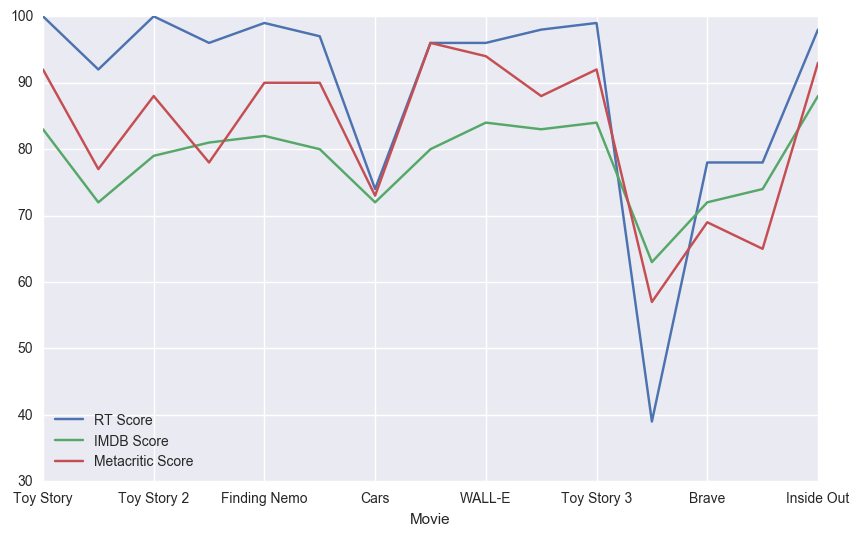

In [6]:
critics_reviews=pixar_movies[["RT Score","IMDB Score","Metacritic Score"]]
critics_reviews.plot(figsize=(10,6))
plt.show()


The IMDB Score and Metacritic Score are close to each other for most movies.

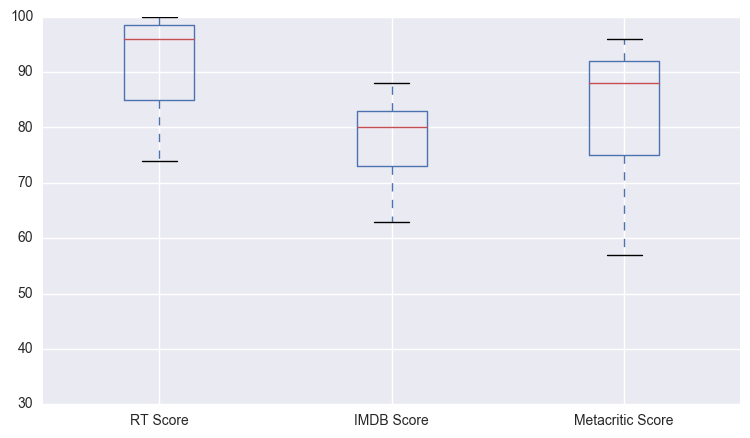

In [7]:
critics_reviews.plot(kind="box", figsize=(9,5))
plt.show()

RT Score is basically the percentage of people who liked the movie. For animated movies are generally loved by people. Hence the Avg and the spread of RT Score is above 70 with avg score near about 95. With Metacritic the Score is derived from the ratings given by prestigious group of 30-50 writers from the most recognizable names in the industry (New York Times, Wall Street Journal, Chicago Sun-Times, etc.). Since the critics judge the movie on various parameters the spread of Metacritic Score is in accordance with it. IMDB score has the least spread with the lowest avg rating. Its rating are given by users who are frequent in rating movies and are movie buffs.

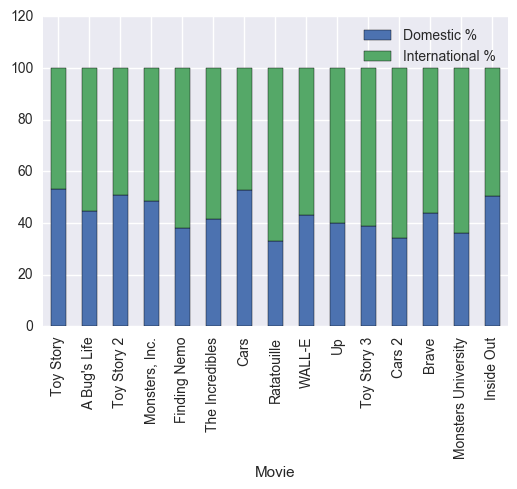

In [8]:
revenue_proportions=pixar_movies[["Domestic %", "International %"]]
revenue_proportions.plot(kind="bar", stacked=True)
plt.show()


As per precentage of revenue collections the share of international market is more than domestic. These movies have wide appeal.

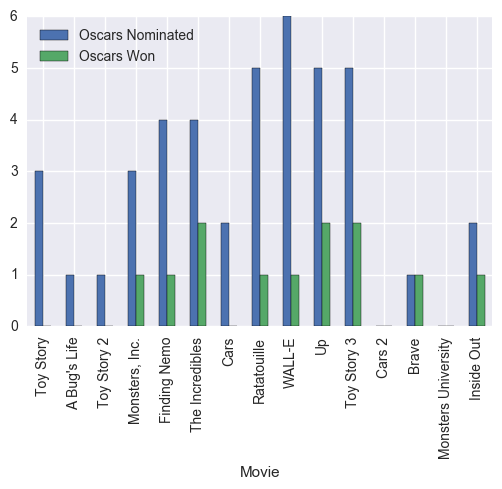

In [14]:
#Grouped bar plot for Oscars nominations and oscars won
pixar_movies[["Oscars Nominated","Oscars Won"]].plot(kind="bar")
plt.show()


Movies with most oscar nominations are : WALL-E(5), Up(4), Toy Story 3(4), Ratatouille(4), 
Movies with most oscars won are: The Incredibles(2), Up(2), Toy Story 3(2)

In [10]:
#Calculating avg rating of each movie
def avg_rating(row):
    return row[["IMDB Score", "Metacritic Score","RT Score"]].mean()
pixar_movies["Avg Rating"] = pixar_movies.apply(avg_rating, axis=1)


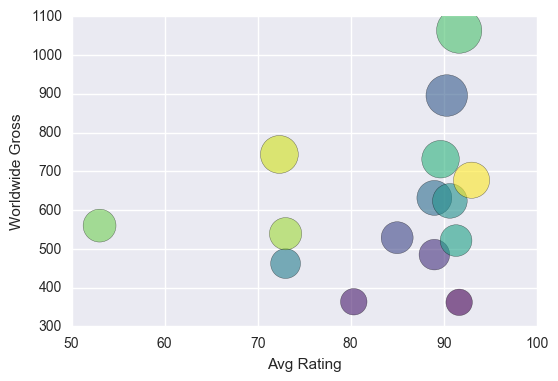

In [11]:
plt.scatter(pixar_movies["Avg Rating"], pixar_movies["Worldwide Gross"],s=pixar_movies["Worldwide Gross"],alpha=0.6, c=np.arange(15), cmap='viridis')
plt.xlabel("Avg Rating")
plt.ylabel("Worldwide Gross")
plt.show()

The size of the circle co-relates to the Worldwide grossing of the movie. Movies with high ratings that is above 80 have collected more revenue.

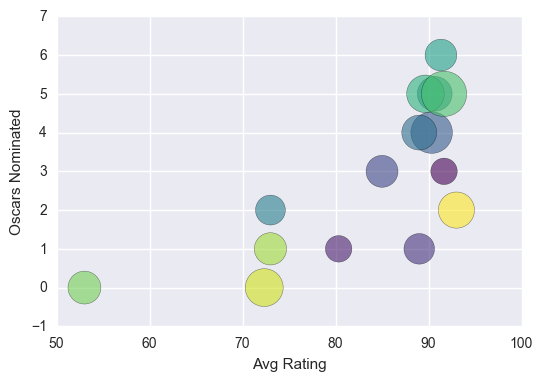

In [17]:
t=np.arange(15)
plt.scatter(x=pixar_movies["Avg Rating"], y=pixar_movies["Oscars Nominated"], s=pixar_movies["Worldwide Gross"],alpha=0.6, c=t, cmap='viridis')
plt.xlabel("Avg Rating")
plt.ylabel("Oscars Nominated")
plt.show()

Movies with more than 2 oscar nominations all have an avg rating above 80. This was to be expected as oscars nominations are a prestigious affair.